In [126]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score

In [63]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = Y
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Ex b

In [75]:
df_setosa = df[df['target'] == 0]
df_setosa.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [39]:
def get_basic_stat(data):
    print('Moyenne : ', data.mean())
    print('Max : ', data.max())
    print('Min : ', data.min())
    print('Std : ', data.std())
    print('Median : ', np.median(data))
#     print('Mode : ', mode(data))
    print("Q2 : ", np.quantile(data, .50)) 
    print("Q1 : ", np.quantile(data, .25)) 
    print("Q3 : ", np.quantile(data, .75)) 

In [80]:
print('Basic stats Sepal Lenght : ')
get_basic_stat(df_setosa['sepal length (cm)'])

print()

print('Basic stats Sepal Width : ')
get_basic_stat(df_setosa['sepal width (cm)'])

Basic stats Sepal Lenght : 
Moyenne :  5.006
Max :  5.8
Min :  4.3
Std :  0.35248968721345136
Median :  5.0
Q2 :  5.0
Q1 :  4.8
Q3 :  5.2

Basic stats Sepal Width : 
Moyenne :  3.428
Max :  4.4
Min :  2.3
Std :  0.3790643690962887
Median :  3.4
Q2 :  3.4
Q1 :  3.2
Q3 :  3.6750000000000003


# Ex c

In [74]:
np.correlate(a=df_setosa['sepal length (cm)'], v=df_setosa['sepal width (cm)'])

array([862.89])

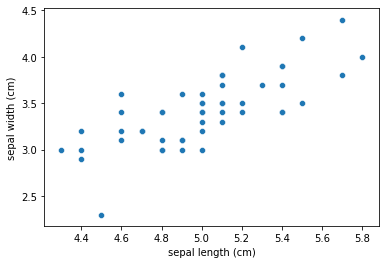

In [78]:
sns.scatterplot(x=df_setosa['sepal length (cm)'], y=df_setosa['sepal width (cm)'])

# Ex d

In [100]:
linearRegression = LinearRegression()
model = linearRegression.fit([df_setosa['sepal length (cm)']], [df_setosa['sepal width (cm)']])

In [131]:
y_train_pred = model.predict([df_setosa['sepal length (cm)']])
y_train_pred = pd.DataFrame(y_train_pred)
y_train = pd.DataFrame(df_setosa['sepal width (cm)']).T
y_train = y_train.reset_index()
del y_train['index']
explained_variance_score(y_train_pred, y_train)

1.0

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [149]:
linearRegression = LinearRegression()
model = linearRegression.fit(X_train, y_train)

In [157]:
y_train_pred = model.predict(X_train)
y_train_pred
y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred = y_train_pred.T
y_train = pd.DataFrame(y_train)
y_train = y_train.T.reset_index()
del y_train['index']
# y_train
accuracy_score(y_train, y_train_pred)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and continuous-multioutput targets

## Ex G

In [ ]:
from sklearn import decomposition
df = df.loc[df['Sport'] == 'Athletics']